In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 1.0,
 'learning_rate': 0.1,
 'length_of_sequences': 50,
 'num_of_hidden_nodes': 2,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 2000,
 'optimizer': 'AdamOptimizer',
 'seed': 0,
 'size_of_mini_batch': 100,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01,  -9.51056516e-01,  -9.04827052e-01,
        -8.44327926e-01,  -7.70513243e-01,  -6.84547106e-01,
        -5.87785252e-01,  -4.81753674e-01,  -3.68124553e-01,
        -2.48689887e-01,

In [5]:
output = np.load("output.npy")
output

array([  2.83628702e-04,   1.25220656e-01,   2.46496677e-01,
         3.62098396e-01,   4.71018583e-01,   5.73093295e-01,
         6.68254435e-01,   7.55321681e-01,   8.31420958e-01,
         8.92778456e-01,   9.36342835e-01,   9.61099923e-01,
         9.68107462e-01,   9.59291101e-01,   9.36133742e-01,
         8.99040818e-01,   8.47349465e-01,   7.79820740e-01,
         6.95699573e-01,   5.96313715e-01,   4.86185819e-01,
         3.71985435e-01,   2.59565383e-01,   1.51709214e-01,
         4.80490923e-02,  -5.36487699e-02,  -1.56006217e-01,
        -2.60868192e-01,  -3.68465126e-01,  -4.76891696e-01,
        -5.82098544e-01,  -6.78666294e-01,  -7.61285603e-01,
        -8.26281726e-01,  -8.72356117e-01,  -9.00277674e-01,
        -9.11976278e-01,  -9.09641206e-01,  -8.95137727e-01,
        -8.69748294e-01,  -8.34122002e-01,  -7.88319170e-01,
        -7.31931269e-01,  -6.64238214e-01,  -5.84427655e-01,
        -4.91863847e-01,  -3.86521637e-01,  -2.69454122e-01,
        -1.43157899e-01,

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   6.10969737e-02],
       [  2.00000000e+01,   7.77162658e-03],
       [  3.00000000e+01,   5.52238105e-03],
       [  4.00000000e+01,   1.76544930e-03],
       [  5.00000000e+01,   1.60719675e-03],
       [  6.00000000e+01,   1.13896222e-03],
       [  7.00000000e+01,   4.38332325e-04],
       [  8.00000000e+01,   5.86728682e-04],
       [  9.00000000e+01,   5.89998439e-04],
       [  1.00000000e+02,   2.79696338e-04],
       [  1.10000000e+02,   2.95644713e-04],
       [  1.20000000e+02,   2.29450132e-04],
       [  1.30000000e+02,   2.56181287e-04],
       [  1.40000000e+02,   1.35044422e-04],
       [  1.50000000e+02,   9.05569832e-05],
       [  1.60000000e+02,   9.92824134e-05],
       [  1.70000000e+02,   8.34013335e-05],
       [  1.80000000e+02,   9.14113989e-05],
       [  1.90000000e+02,   1.08302695e-04],
       [  2.00000000e+02,   1.17158750e-04],
       [  2.10000000e+02,   1.10270797e-04],
       [  2.20000000e+02,   3.83183906e-05],
       [  

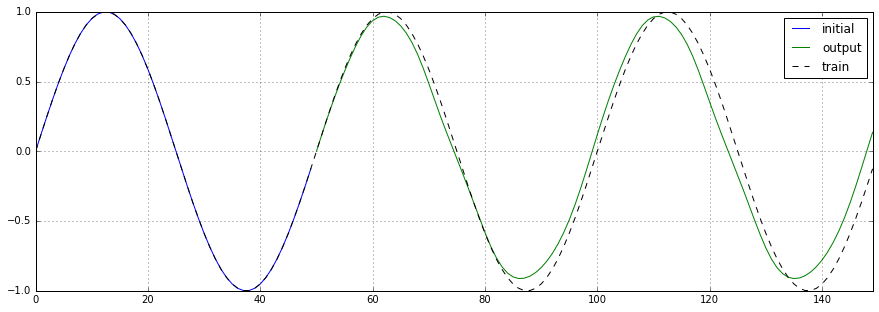

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

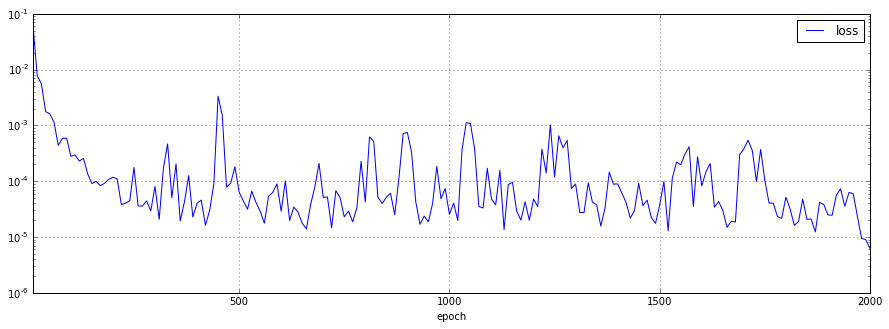

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")